In [2]:
# import function we need
import keras
from keras.layers import Input, Dense
from keras.models import Model
import pickle 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#process data
data = pickle.load(open('./data_after_process/EECE7397/EECE7397_cache', "rb"))

In [120]:
#print(data[0][:])

In [84]:
use_data = []
for i in range(0,len(data)):
    use_data.append(np.array(data[i][:]).T)
use_data = np.array(use_data)

In [85]:
#use_data = np.array(data[0][:])
#for i in range(1,len(data)):
#    np.concatenate([use_data,np.array(data[i][:])], axis = 2)

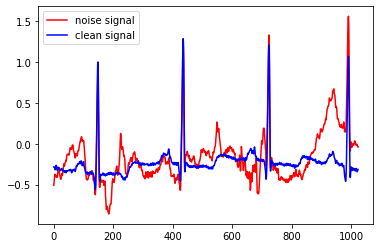

In [88]:
# use_data(1,:,0) is the first people noise data, and use_data(1,:,1) is the first people clean data
num = 0 # if we choose the first patient
plt.figure()
plt.plot(range(0,np.size(use_data,2)),use_data[num][0][:],'r-')
plt.plot(range(0,np.size(use_data,2)),use_data[num][1][:],'b-')
plt.legend(['noise signal','clean signal'])

In [125]:
#start to build auto-encoder here
train_size = int(np.floor(0.6*np.size(use_data,0))) # 0.6  determine trainn validation and test size here
validation_size = int(np.floor(0.8*np.size(use_data,0)))  #0.2
test_size = np.size(use_data,0)  #0.2

encoding_dim = 128 #32 #the input size is 1024, and the compression size is 128

input_signal = Input(shape =(np.size(use_data,2),)) # np.size(use_data,2) = 1024
#encode paer
encoded = Dense(encoding_dim, activation='relu')(input_signal)

#decode part
decoded = Dense(np.size(use_data,2), activation='sigmoid')(encoded)

#input_data = Input(shape=(np.size(use_data,2),))
autoencoder = Model(input_signal, decoded)
encoder = Model(input_signal, encoded)  # encoder model

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))  #decoder model

# this model maps an input to its reconstruction
#autoencoder = Model(input_signal, decoded)

#train model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

x_noise_data = use_data[:,0,:]
x_correct_data =  use_data[:,1,:]

autoencoder.fit(x_noise_data[0:train_size,:], x_correct_data[0:train_size,:],
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_noise_data[train_size:validation_size,:], x_correct_data[train_size:validation_size,:]))

Train on 5520 samples, validate on 1840 samples
Epoch 1/50
5520/5520 [==============================] - 3s 629us/sample - loss: -2.3621 - val_loss: -2.8122
Epoch 2/50
5520/5520 [==============================] - 1s 180us/sample - loss: -6.0787 - val_loss: -3.3067
Epoch 3/50
5520/5520 [==============================] - 1s 178us/sample - loss: -6.3416 - val_loss: -3.4597
Epoch 4/50
5520/5520 [==============================] - 1s 206us/sample - loss: -6.4354 - val_loss: -3.5364
Epoch 5/50
5520/5520 [==============================] - 1s 204us/sample - loss: -6.4854 - val_loss: -3.5855
Epoch 6/50
5520/5520 [==============================] - 1s 197us/sample - loss: -6.5192 - val_loss: -3.6206
Epoch 7/50
5520/5520 [==============================] - 1s 199us/sample - loss: -6.5436 - val_loss: -3.6463
Epoch 8/50
5520/5520 [==============================] - 1s 191us/sample - loss: -6.5621 - val_loss: -3.6670
Epoch 9/50
5520/5520 [==============================] - 1s 175us/sample - loss: -6.5772 

In [126]:
# test the result
encode_result = encoder.predict(x_noise_data[validation_size:test_size,:])
decode_result = decoder.predict(encode_result)

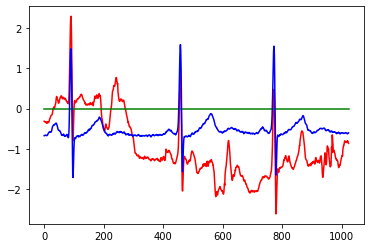

In [130]:
# show the result
k = 0 #return the k-th test result 
plt.figure()
plt.plot(range(0,1024),x_noise_data[validation_size+k,:],'r-')
plt.plot(range(0,1024),decode_result[k,:],'g-')
plt.plot(range(0,1024),x_correct_data[validation_size + k,:],'b-')

In [124]:
use_data[:,0,:]
np.size(x_noise_data[:,0:train_size],1)
decoded

<tf.Tensor 'dense_17/Sigmoid:0' shape=(?, 1024) dtype=float32>

In [102]:
cc = use_data[:,0,:]
cc[0:5520,:]

array([[-0.51 , -0.485, -0.445, ..., -0.025, -0.04 , -0.04 ],
       [-0.49 , -0.485, -0.49 , ..., -0.535, -0.55 , -0.575],
       [-0.115, -0.13 , -0.13 , ..., -0.81 , -0.8  , -0.77 ],
       ...,
       [ 1.475,  1.7  ,  1.83 , ..., -0.295, -0.285, -0.285],
       [ 0.125,  0.19 ,  0.295, ..., -0.32 , -0.315, -0.33 ],
       [-0.28 , -0.28 , -0.28 , ..., -0.92 , -0.915, -0.885]])

In [106]:
np.size(use_data,2)

1024